In [1]:
import os
import glob
import pandas as pd
import altair as alt
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Combine all data file together

In [2]:
os.chdir("data/processed")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

In [4]:
combined_csv.head(5)

,Unnamed: 0,subreddit,author,date,post,substance_use_total,period
0,0,bipolarreddit,onetrueking666,2019/08/04,How to tell a new significant other that you’r...,0,pre
1,1,bipolarreddit,CapriciousFatal,2019/08/04,How many depressive episodes did you have befo...,0,pre
2,2,bipolarreddit,planarX,2019/08/04,"Update, additional advice requested: Bipolar g...",0,pre
3,3,bipolarreddit,i_am_meee,2019/08/04,Think I’m stable but not completely satisfied ...,0,pre
4,4,bipolarreddit,emobf,2019/08/04,In need of some advice/education on Bipolar di...,0,pre


In [5]:
combined_csv.tail(5)

,Unnamed: 0,subreddit,author,date,post,substance_use_total,period
6160,3733,socialanxiety,buriedclementines,2020/04/20,"My beautiful, idiot friends are forcing me int...",0,post
6161,3734,socialanxiety,tjajlol,2020/04/20,Medications? I’m 19 and I’ve been struggling w...,1,post
6162,3735,socialanxiety,xboom131,2020/04/20,Anxious on Social media Does anyone else get a...,0,post
6163,3736,socialanxiety,Banaaaan12,2020/04/20,Helloo I have social anxiety and it really des...,0,post
6164,3737,socialanxiety,dueterzi,2020/04/20,How do you deal with people telling you that y...,0,post


In [6]:
combined_pre = combined_csv.loc[combined_csv['period'] == 'pre'].drop('Unnamed: 0', axis = 1)
combined_post = combined_csv.loc[combined_csv['period'] == 'post'].drop('Unnamed: 0', axis = 1)

In [7]:
print(f'Total number of records in the pre-pandemic dataset: {len(combined_pre)}')

Total number of records in the pre-pandemic dataset: 137853


In [8]:
print(f'Total number of records in the post-pandemic dataset: {len(combined_post)}')

Total number of records in the post-pandemic dataset: 104327


# High level analysis of pre and post dataset on global level

In [9]:
pd.concat([combined_pre.describe(), combined_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,137853.000000,104327.000000
mean,0.510856,0.600458
std,1.221545,1.495582
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,44.000000,53.000000


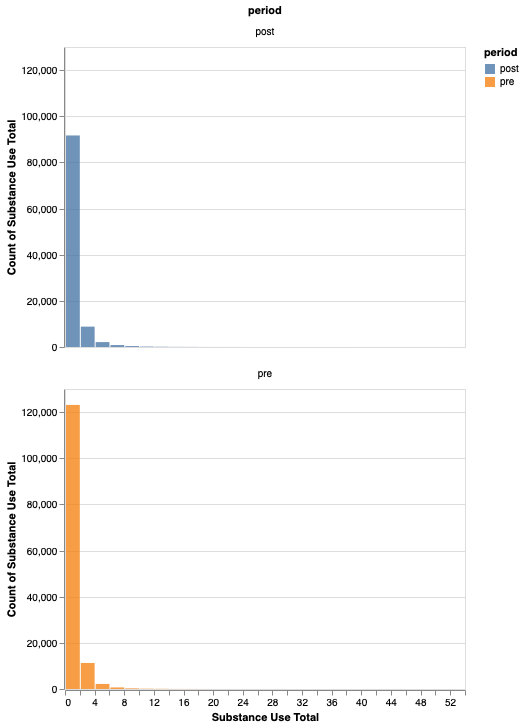

In [10]:
alt.Chart(combined_csv, title = 'Frequency of Substance Use Total Before and After Pandemic').mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30), title = 'Substance Use Total'),
    y=alt.Y('count()', title = 'Count of Substance Use Total'),
    color='period'
).facet('period', columns=1)

In [11]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(combined_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(combined_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 128251
Number of unique authors (posters) in 'post' dataset: 95135


# Summary

1. At the global level, some authors contribute to more than one records in the dataset.
2. The number of unique authors before the pandemic is more than after pandemic for all subreddit.
3. The mean of the substance use total before pandemic is slower than after pandemic for all subreddit. 